In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

In [170]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path


## Chapter 6

### Problem 6

We will now explore (6.12) and (6.13) further. 			 	

#### Part (a)

Consider (6.12) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.12) as a function of $β_1$. Your plot should confirm that (6.12) is solved by (6.14).

($y_1-\beta_1)^2+ \lambda \beta_1^2$
Let $y_1=1$ and $\lambda =2$.

In [171]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 2*beta**2

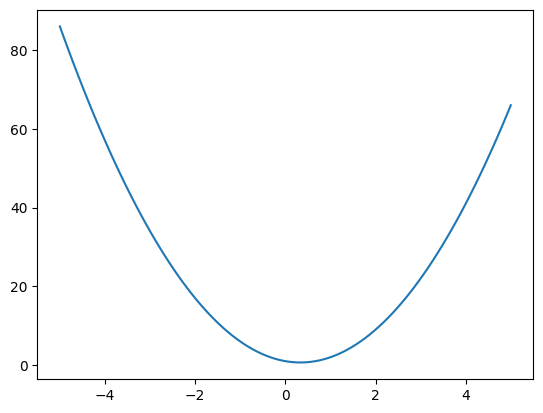

In [172]:
plt.plot(beta,z)

So the minimum is at 1/3, which corresponds to the result from 6.14 as expected.

#### Part (b)

Consider (6.13) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.13) as a function of $β_1$. Your plot should confirm that (6.13) is solved by (6.15).

Let $y_1=1$ and $\lambda=3$

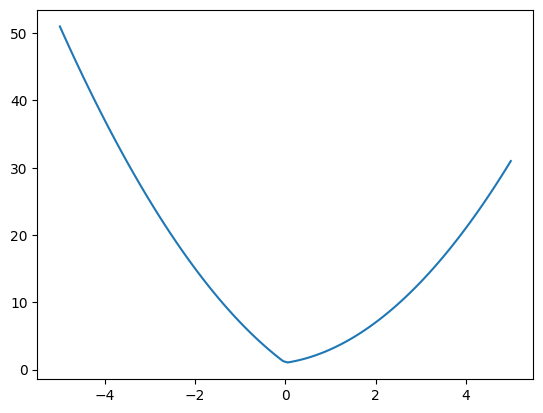

In [173]:
beta=np.linspace(-5,5,100)
z=(1-beta)**2 + 3*np.abs(beta)
plt.plot(beta,z)

The minimum is now at zero as we see in 6.15.

Let's examine all of the piecewise cases in 6.15 for this example.

Here lambda is 1 and $y_1$ is 2.

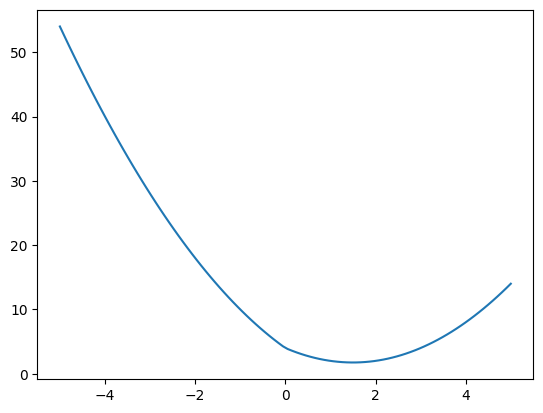

In [174]:
beta=np.linspace(-5,5,100)
z=(2-beta)**2 + 1*np.abs(beta)
plt.plot(beta,z)

### Problem 7

We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.

#### Part (a)

Suppose that $y_i = β_0 +\sum_{j=1}^p x_{i j} β_j +ε_i$ where $ε_1, \cdots , ε_n$ are independent and identically distributed from a $N(0, σ^2)$ distribution. Write out the likelihood for the data.

### Part (b)

Assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a double-exponential distribution with mean 0 and common scale parameter $b$: i.e. $p(β) = 1/(2b)$ exp($−|β|/b)$. Write out the posterior for $β$ in this setting. 

#### Part (c)

Argue that the lasso estimate is the mode for $β$ under this posterior distribution.

#### Part (d)

Now assume the following prior for $β: β_1, . . . , β_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $β$ in this setting.

#### Part (e)

Argue that the ridge regression estimate is both the mode and the mean for $β$ under this posterior distribution.

## Applied Problems

In [175]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
import pandas as pd

### Problem 8

In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

#### Part (a)

Create a random number generator and use its normal() method to generate a predictor $X$ of length $n = 100$, as well as a noise vector $ε$ of length $n = 100$.

In [176]:
x=np.random.normal(0,1,100)
epsilon=np.random.normal(0,1,100)
x

array([-1.47526708,  0.69911068,  0.04936329,  0.80959464, -0.55016619,
       -0.98863668,  1.21426919, -0.32936774,  0.83581024,  1.43617966,
       -0.82689713,  0.60436706, -0.26323212,  0.32525423,  1.07171628,
       -0.11300285, -0.40573514,  1.34719681, -0.14886091, -0.16502593,
       -1.20769304,  0.25350355,  0.2185493 , -1.24956625, -0.16545633,
        0.88606045, -0.84896763,  1.28371279,  1.70351352,  0.40740157,
       -0.63989964, -1.00875848, -0.22563713,  1.29397993, -1.26396368,
       -0.20539577, -2.75748625, -1.91591957,  0.44535477, -1.49580183,
       -2.2051571 ,  0.67345099,  0.13726298,  0.13348844, -1.66818745,
        0.18697258,  1.33532783,  1.59067301,  0.52878531, -0.13310355,
        0.44469529,  0.79749363,  0.34440513, -0.83960675,  0.13363606,
        0.84644953,  0.54833316,  0.85996427, -1.23408482, -0.29254939,
        0.60665662,  1.39145066,  1.00359157, -0.85571002, -0.2956076 ,
       -1.13008909, -2.07121438, -0.63264978, -0.2706821 ,  0.11

#### Part (b)

Generate a response vector $Y$ of length $n = 100$ according to the model $$Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε,$$ where $β_0, β_1, β_2, and β_3$ are constants of your choice.

In [177]:
Y=12 + 25*x + 32* x**2 + 40*x**3 + epsilon
Y

array([-8.34936467e+01,  5.74785580e+01,  1.34588574e+01,  7.33891828e+01,
        9.65752608e-01, -2.07467866e+01,  1.61712735e+02,  5.45440237e+00,
        7.67656610e+01,  2.32813006e+02, -9.35430682e+00,  4.88754323e+01,
        5.80851151e+00,  2.38614647e+01,  1.27119077e+02,  1.00645368e+01,
        4.20317397e+00,  2.00567900e+02,  1.13403470e+01,  8.25622527e+00,
       -4.29525544e+01,  1.92167817e+01,  1.99996610e+01, -4.51783807e+01,
        8.93306432e+00,  8.72208270e+01, -9.20596625e+00,  1.80675505e+02,
        3.45706487e+02,  3.20788126e+01, -1.52938713e+00, -2.21460937e+01,
        8.03860191e+00,  1.85017370e+02, -4.95307154e+01,  8.51751001e+00,
       -6.53321217e+02, -1.99642364e+02,  3.20577799e+01, -8.73808584e+01,
       -3.15971154e+02,  5.37773576e+01,  1.73431656e+01,  1.70946388e+01,
       -1.25213169e+02,  1.84890740e+01,  1.97621155e+02,  2.93255896e+02,
        3.98675840e+01,  8.72051904e+00,  3.19188422e+01,  7.33638512e+01,
        2.47622388e+01, -

#### Part (c)

Use forward stepwise selection in order to select a model containing the predictors $X, X^2, . . . , X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.

In [178]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

In [179]:
X_df = pd.DataFrame({'X': x,'X^2': x**2, 'X^3':x**3,'X^4':x**4,'X^5':x**5,'X^6':x**6,'X^7':x**7,'X^8':x**8,'X^9':x**9,'X^10':x**10})
Y_df = pd.DataFrame({'Y': Y})


In [180]:
from statsmodels.api import OLS

In [181]:
X_df

,X,X^2,X^3,X^4,X^5,X^6,X^7,X^8,X^9,X^10
0,-1.475267,2.176413,-3.210790,4.736773,-6.988006e+00,1.030917e+01,-1.520879e+01,2.243702e+01,-3.310060e+01,4.883222e+01
1,0.699111,0.488756,0.341694,0.238882,1.670051e-01,1.167550e-01,8.162469e-02,5.706469e-02,3.989454e-02,2.789070e-02
2,0.049363,0.002437,0.000120,0.000006,2.931030e-07,1.446853e-08,7.142140e-10,3.525595e-11,1.740350e-12,8.590937e-14
3,0.809595,0.655443,0.530644,0.429606,3.478068e-01,2.815825e-01,2.279677e-01,1.845614e-01,1.494200e-01,1.209696e-01
4,-0.550166,0.302683,-0.166526,0.091617,-5.040452e-02,2.773086e-02,-1.525658e-02,8.393656e-03,-4.617906e-03,2.540616e-03
...,...,...,...,...,...,...,...,...,...,...
95,-0.412820,0.170420,-0.070353,0.029043,-1.198956e-02,4.949529e-03,-2.043264e-03,8.435001e-04,-3.482136e-04,1.437495e-04
96,0.295153,0.087115,0.025712,0.007589,2.239938e-03,6.611244e-04,1.951328e-04,5.759404e-05,1.699905e-05,5.017322e-06
97,-0.341475,0.116605,-0.039818,0.013597,-4.642979e-03,1.585463e-03,-5.413965e-04,1.848736e-04,-6.312976e-05,2.155726e-05
98,-0.951381,0.905125,-0.861118,0.819251,-7.794195e-01,7.415245e-01,-7.054720e-01,6.711723e-01,-6.385402e-01,6.074947e-01


In [182]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [183]:
##results1 = sigma2.fit()
##summarize(results1)

See the lab section on forward stepwise selection!

In [184]:
design

ModelSpec(terms=           X       X^2       X^3        X^4           X^5           X^6  \
0  -1.475267  2.176413 -3.210790   4.736773 -6.988006e+00  1.030917e+01   
1   0.699111  0.488756  0.341694   0.238882  1.670051e-01  1.167550e-01   
2   0.049363  0.002437  0.000120   0.000006  2.931030e-07  1.446853e-08   
3   0.809595  0.655443  0.530644   0.429606  3.478068e-01  2.815825e-01   
4  -0.550166  0.302683 -0.166526   0.091617 -5.040452e-02  2.773086e-02   
..       ...       ...       ...        ...           ...           ...   
95 -0.4...
3   2.279677e-01  1.845614e-01  1.494200e-01  1.209696e-01  
4  -1.525658e-02  8.393656e-03 -4.617906e-03  2.540616e-03  
..           ...           ...           ...           ...  
95 -2.043264e-03  8.435001e-04 -3.482136e-04  1.437495e-04  
96  1.951328e-04  5.759404e-05  1.699905e-05  5.017322e-06  
97 -5.413965e-04  1.848736e-04 -6.312976e-05  2.155726e-05  
98 -7.054720e-01  6.711723e-01 -6.385402e-01  6.074947e-01  
99  7.614085e+01  1.413905e+02  2.625565e+02  4.875569e+02  

[100 rows x 10 columns])

In [185]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

In [186]:
df_MSE = sklearn_selected(OLS,
                               strategy)
df_MSE.fit(X_df, Ynew)
df_MSE.selected_state_

('X', 'X^10', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9')

In [187]:
neg_Cp = partial(nCp, sigma2)

In [188]:
df_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
df_Cp.fit(Xnew,Ynew)
df_Cp.selected_state_

('X', 'X^2', 'X^3')

The model obtained according to Cp involves x, x^2, x^3

In [189]:
df_Cp.get_params()

{'cv': None,
 'model_args': {},
 'model_type': statsmodels.regression.linear_model.OLS,
 'scoring': functools.partial(<function nCp at 0x346307880>, 0.908662288550275),
 'strategy': Strategy(initial_state=(), candidate_states=<bound method Stepwise.candidate_states of <ISLP.models.strategy.Stepwise object at 0x346200770>>, build_submodel=<bound method ModelSpec.build_submodel of ModelSpec(terms=           X       X^2       X^3        X^4           X^5           X^6  \
 0  -1.475267  2.176413 -3.210790   4.736773 -6.988006e+00  1.030917e+01   
 1   0.699111  0.488756  0.341694   0.238882  1.670051e-01  1.167550e-01   
 2   0.049363  0.002437  0.000120   0.000006  2.931030e-07  1.446853e-08   
 3   0.809595  0.655443  0.530644   0.429606  3.478068e-01  2.815825e-01   
 4  -0.550166  0.302683 -0.166526   0.091617 -5.040452e-02  2.773086e-02   
 ..       ...       ...       ...        ...           ...           ...   
 95 -0.4...
 3   2.279677e-01  1.845614e-01  1.494200e-01  1.209696e-01

#### Part (d)

Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [190]:
strategy2 = Stepwise.first_peak(design,direction='backwards',max_terms=len(design.terms))
neg_Cp1=partial(nCp,sigma2)
Y_CpBack=sklearn_selected(OLS,strategy2,scoring=neg_Cp1)
Y_CpBack.fit(Xnew,Ynew)
Y_CpBack.selected_state_

('X', 'X^2', 'X^3')

In [191]:
#strategy2 = Stepwise(design,
#                        direction='backward', ***** backward vs backwards *****
#                        min_terms=1,
#                        max_terms=len(design.terms))

In [192]:
#df_Cp = sklearn_selected(OLS,
#                               strategy2,
#                               scoring=neg_Cp)
#results1=df_Cp.fit(df, Y)
#df_Cp.selected_state_

#### Part (e)

Now fit a lasso model to the simulated data, again using $X,X^2, . . . , X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefficient estimates, and discuss the results obtained.

In [193]:
scaler = StandardScaler(with_mean=True,  with_std=True)

In [194]:
K=5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [195]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('lasso', lassoCV)])
pipeCV.fit(X_df, Y_df)
tuned_lasso = pipeCV.named_steps['lasso'] 
tuned_lasso.alpha_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12124050864168487

In [196]:
tuned_lasso.coef_

array([ 24.17042846,  39.8062465 , 125.57566668,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ])

In [197]:
Xs = X_df - X_df.mean(0)[None,:]
X_scale = X_df.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std() 
soln_array = skl.ElasticNet.path(Xs,
                                Y,
                                l1_ratio=1., 
                                alphas=lambdas)[1]
soln_array.shape



/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/1239374391.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X_df - X_df.mean(0)[None,:]
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/1239374391.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.49931114738865, tolerance: 168.27914905488973
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/si

(10, 100)

In [198]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [199]:
D=design.fit_transform(X_df)
D=D.drop('intercept',axis=1)

In [200]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                     Y, 
                                     l1_ratio=1,
                                    n_alphas=100)[:2] 
soln_path = pd.DataFrame(soln_array.T,
                        columns=D.columns, 
                        index=-np.log(lambdas))

In [201]:
np.min(tuned_lasso.mse_path_.mean(1))

1.1177459712601987

Let's create a plot of the cross-validation error.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/2312041740.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


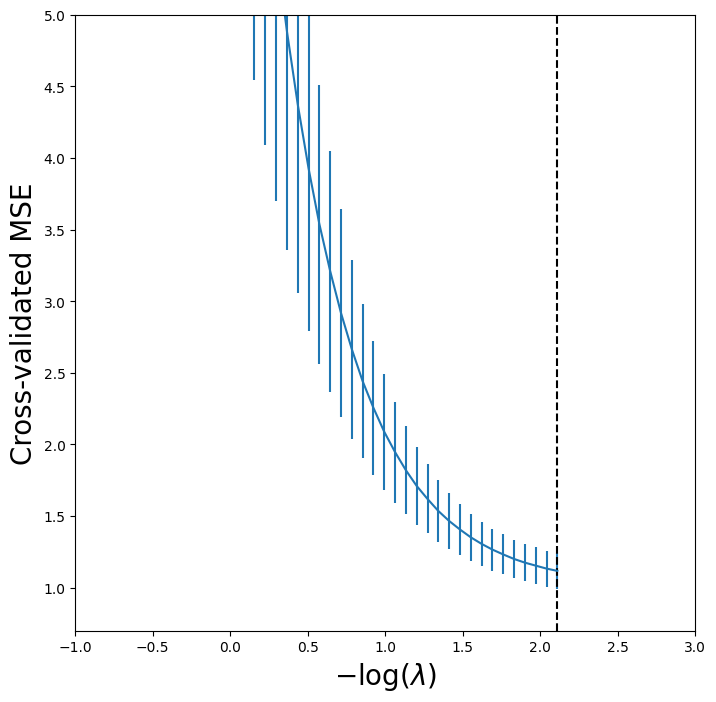

In [202]:
lassoCV_fig, ax = subplots(figsize=(8,8)) 
ax.errorbar(-np.log(tuned_lasso.alphas_),
                    tuned_lasso.mse_path_.mean(1),
                    yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K)) 
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--') 
ax.set_ylim([0.7,5])
ax.set_xlim([-1,3])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20) 
ax.set_ylabel('Cross-validated MSE', fontsize=20);

The coefficients are:

In [203]:
tuned_lasso.coef_

array([ 24.17042846,  39.8062465 , 125.57566668,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ])

Six coefficients are exactly zero with Lasso.

Discussion Question: Why is the minimum lambda value the same as the best lambda value? And why is there a minimum lambda value here?

#### Part (f)

Now generate a response vector $Y$ according to the model $$Y = β_0 + β_7X^7 + ε,$$ and perform forward stepwise selection and the lasso. Discuss the results obtained.

Forward Stepwise:

In [204]:
Y=10+100*x**7+epsilon
X_df = pd.DataFrame({'X': x,'X^2': x**2, 'X^3':x**3,'X^4':x**4,'X^5':x**5,'X^6':x**6,'X^7':x**7,'X^8':x**8,'X^9':x**9,'X^10':x**10})
Y_df= pd.DataFrame({'Y':Y})

In [205]:
design = MS(X_df).fit(X_df)
Ynew=np.array(Y_df['Y'])
Xnew = design.transform(X_df)
sigma2 = OLS(Ynew,Xnew).fit().scale

In [206]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

In [207]:
df_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
df_Cp.fit(Xnew,Ynew)
df_Cp.selected_state_

('X^7',)

In forward stepwise selection, the best model will have nonzero coefficients for X^4 and X^7.

Lasso:

In [208]:
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('lasso', lassoCV)])
pipeCV.fit(X_df, Y_df)
tuned_lasso = pipeCV.named_steps['lasso'] 
tuned_lasso.alpha_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.557834533659726

In [209]:
tuned_lasso.coef_

array([ -48.51596791,    0.        ,    0.        ,   -0.        ,
       1850.64246023, -226.35876393, 7548.02289378,   -0.        ,
       3015.63032545,   -0.        ])

Why do these coefficients seem so different than the chosen coefficient? We expected more of a lean toward X^7. Maybe come back to this to see if it's incorrect.

### Problem 9

In this exercise, we will predict the number of applications received using the other variables in the College data set.

In [210]:
college=load_data('college')
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [211]:
np.isnan(college['Apps']).sum()

0

In [212]:
college=college.dropna()

In [213]:
college=college.drop('Private', axis=1)

In [214]:
college

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


#### Part (a)

Split the data set into a training set and a test set.

In [215]:
college_train, college_valid = train_test_split(college,
                                         test_size=100,
                                         random_state=0)

#### Part (b)

Fit a linear model using least squares on the training set, and report the test error obtained.

In [216]:
design = MS(college_train.columns.drop('Apps')).fit(college_train)
Y = np.array(college_train['Apps'])
X = design.transform(college_train)
sigma2 = OLS(Y,X).fit().scale

Needed to drop the first column with strings.

#### Part (c)

Fit a ridge regression model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained.

Associated with each value of $\lambda$ is a vector of ridge regression coefficients,   that can be accessed by a column of `soln_array`. In this case, `soln_array` is a $16 \times 100$ matrix, with
16 rows (one for each predictor) and 100
columns (one for each value of $\lambda$).

We transpose this matrix and turn it into a data frame to facilitate viewing and plotting.

In [217]:
Xs = X - X.mean(0)[None,:]
Xs=Xs.drop('intercept', axis=1)
X_scale = Xs.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std() 
soln_array = skl.ElasticNet.path(Xs,
                                Y,
                                l1_ratio=1., 
                                alphas=lambdas)[1]
soln_array.shape

/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/2070406009.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/2070406009.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]


(16, 100)

We plot the paths to get a sense of how the coefficients vary with $\lambda$.
To control the location of the legend we first set `legend` to `False` in the
plot method, adding it afterward with the `legend()` method of `ax`.

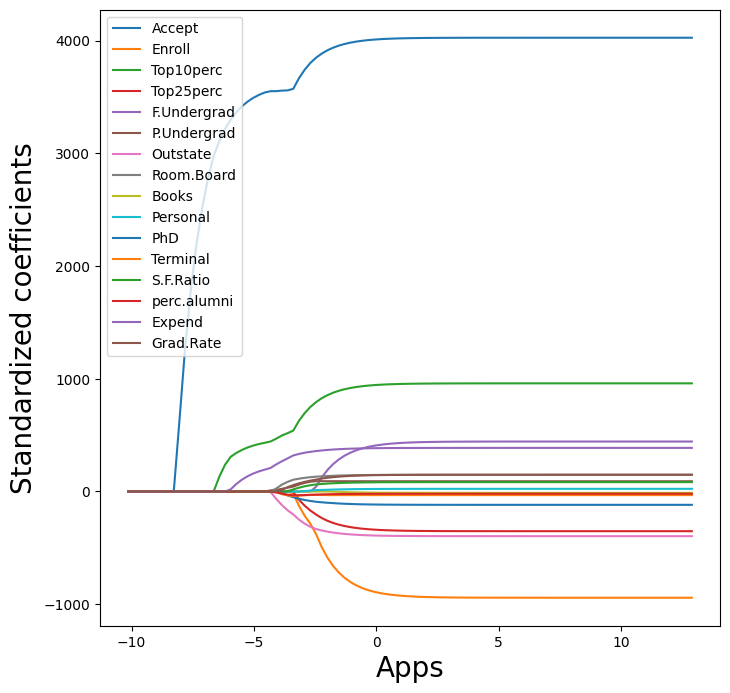

In [218]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xs.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'Apps'
soln_path
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('Apps', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');


In [219]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(2.9025749094695104,
 Accept         3980.897228
 Enroll         -802.075304
 Top10perc       917.888999
 Top25perc      -315.704146
 F.Undergrad     343.623151
 P.Undergrad      91.121617
 Outstate       -380.415663
 Room.Board      143.967696
 Books            -6.658052
 Personal         20.310927
 PhD            -110.753912
 Terminal        -32.013779
 S.F.Ratio        78.211518
 perc.alumni     -21.627901
 Expend          379.624005
 Grad.Rate       137.980347
 Name: -1.0655982428596331, dtype: float64)

Implementing ridge regression with elastic net from SKLearn

In [220]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.094e+08, tolerance: 1.062e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.02770648400179486, l1_ratio=0))])

We fix the random state of the splitter so that the results obtained will be reproducible.

Test Error:

In [221]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+08, tolerance: 3.441e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([1642863.91112127])

This is the Test MSE 1.643e+06.

#### Part (d)

Fit a lasso model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [222]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

3.743608110554328

In [223]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=Xs.columns,
                         index=-np.log(lambdas))

We can see from the coefficient plot of the standardized coefficients that depending on the choice of
tuning parameter, some of the coefficients will be exactly equal to
zero.

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/268966441.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


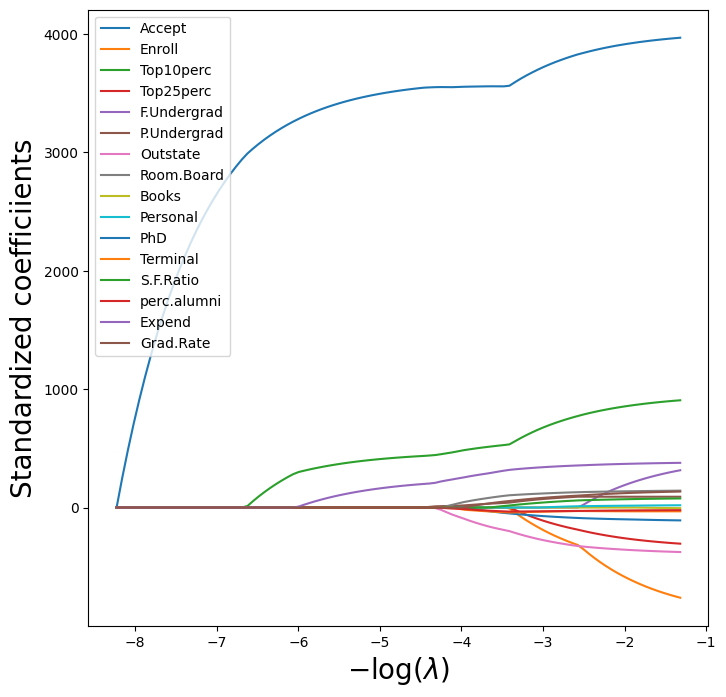

In [224]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [225]:
np.min(tuned_lasso.mse_path_.mean(1))

1308989.35930803

In [226]:
tuned_lasso.coef_

array([   0.        , 3964.33086424, -758.8426754 ,  905.00832073,
       -304.75314473,  313.27745631,   91.11443925, -375.49053392,
        142.60705785,   -5.10678236,   19.30618842, -108.4750725 ,
        -32.03017229,   76.66831112,  -22.23150702,  377.29205862,
        134.80889174])

This is rather frightening. Perhaps it would be worth it to scale the data more before applying this regression technique. 18 of the 19 coefficients are nonzero.

Test MSE:

In [227]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(tuned_lasso,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

array([2017037.07537124])

The MSE is 2.017e+06.

#### Part (e)

Fit a PCR (Principal Components Regression) model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [228]:
from sklearn.decomposition import PCA

In [229]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


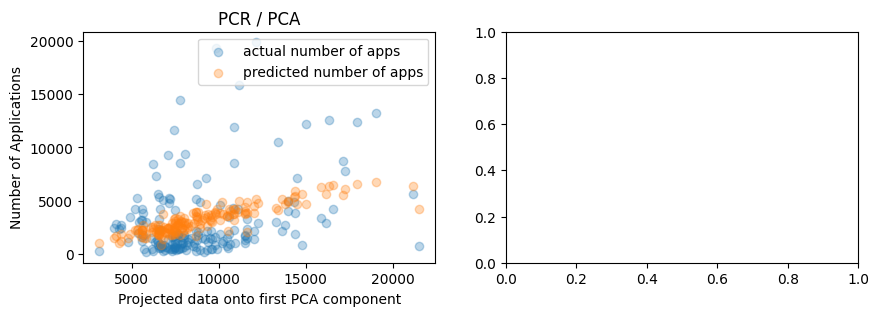

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="actual number of apps")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predicted number of apps"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="Number of Applications", title="PCR / PCA"
)
axes[0].legend()

In [231]:
print(pca.components_)

[[ 2.22044605e-16  8.93371472e-02  5.56866794e-02  3.59978954e-01
   3.39702161e-01  3.07141296e-02 -4.32471932e-02  3.55084756e-01
   2.82159635e-01  4.48382210e-02 -1.18746646e-01  3.02431639e-01
   2.97425367e-01 -2.44655736e-01  2.74448578e-01  3.50043339e-01
   2.85789739e-01]]


In [232]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()

In [233]:
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 584.08353181, 1594.11650542])

In [234]:
param_grid = {'pca__n_components': range(1, 18)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

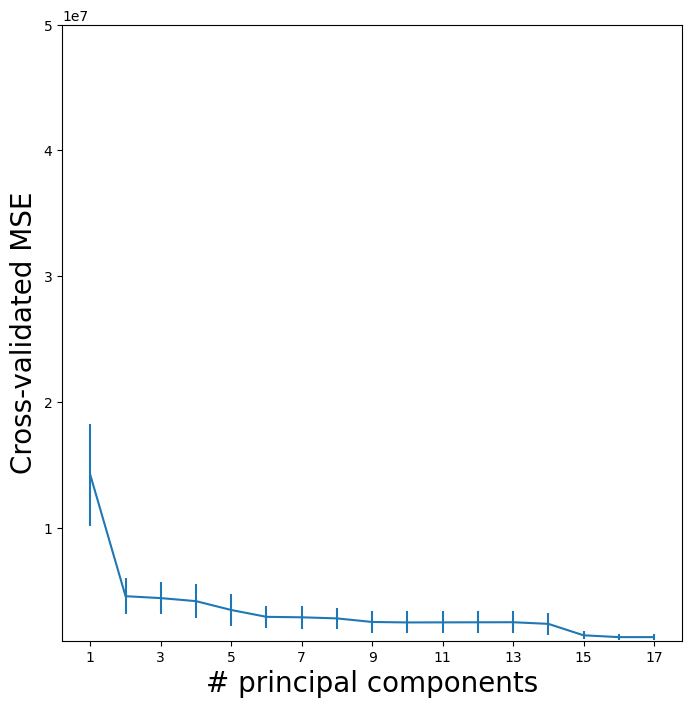

In [235]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([1000000,50000000]);

In [240]:
-grid.cv_results_['mean_test_score'][1]

4542283.390996542

So when we choose to use 2 principal components, we have this mean test errror.

Maybe 2 principal components is the way to go or maybe 6.

In [236]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.32876419, 0.24272589])

With two components we capture 56% of the variance, but adding additional components only captures 5% more for each component as seen below:

In [237]:
pca = PCA(n_components=7)
linreg = skl.LinearRegression()
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_
pipe.named_steps['pca'].explained_variance_ratio_

array([0.32876419, 0.24272589, 0.07306475, 0.05818396, 0.05703538,
       0.05271256, 0.037862  ])

#### Part (f)

Fit a PLS (Partial Least Squares Regression) model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [241]:
pls = PLSRegression(n_components=2, 
                    scale=True)
pls.fit(X, Y)

PLSRegression()

In [242]:
param_grid = {'n_components':range(1, 18)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

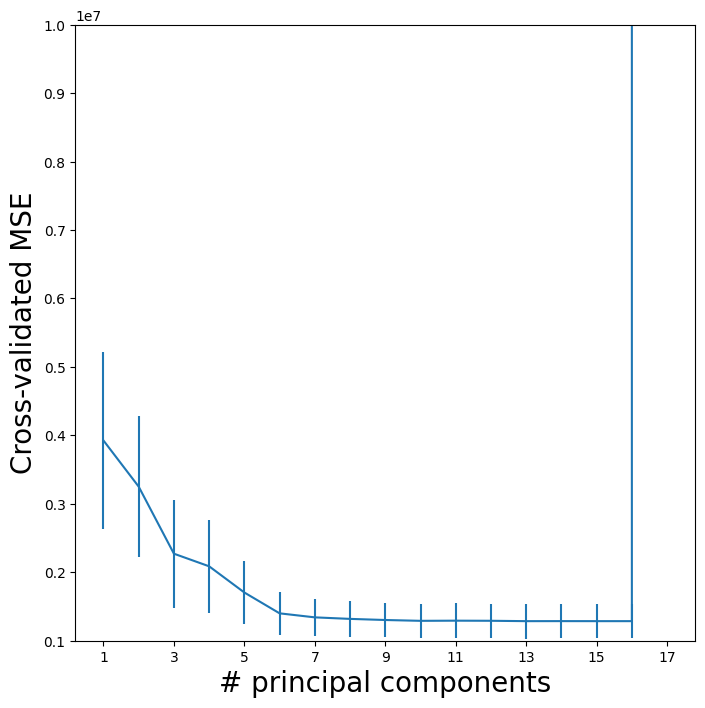

In [245]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([1000000,10000000]);

Maybe 6 principal components is worth using for PLS.

In [247]:
-grid.cv_results_['mean_test_score'][5]

1400020.8241027321

In [253]:
grid.cv_results_['std_test_score'][5] / np.sqrt(K)

309638.67693467054

We are unsure why the standard deviation error bar is so different at 17 principal components.

In [251]:
-grid.cv_results_['mean_test_score'][15]

1285972.203935001

In [252]:
grid.cv_results_['std_test_score'][15] / np.sqrt(K)

252922.8709799665

In [254]:
-grid.cv_results_['mean_test_score'][16]

1.3092227132772853e+35

In [255]:
grid.cv_results_['std_test_score'][16] / np.sqrt(K)

5.7565155040601525e+34

#### Part (g)

Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

We cannot predict very accurately the number of college applications received. PLS looks like possibly the best test error. Ridge regression also yields a similarly mediocre test error. But there is not any significant clear-cut winner.

### Problem 10

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

#### Part (a)

Generate a data set with $p = 20$ features, $n = 1000$ observations, and an associated quantitative response vector generated according to the model $$Y =Xβ+ε,$$ where $β$ has some elements that are exactly equal to zero.

In [257]:
x= pd.DataFrame(np.random.randn(1000, 20))
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.261503,-0.252352,1.701586,-0.383513,-1.355603,-0.647221,0.531662,-0.948679,-0.945645,2.956578,0.817212,0.401138,-0.183032,-0.605758,-0.436536,-1.969168,-1.046597,0.748326,1.176941,1.588566
1,-0.028491,0.087893,-0.957789,1.897238,-1.039578,0.962139,0.029141,-1.099332,-0.456450,-1.176545,0.176565,-0.819832,0.616499,0.354847,-0.350638,-0.291752,-0.951023,-1.598096,-1.726957,1.246158
2,-0.737628,-0.822483,-0.694582,-0.788996,-0.046108,-0.048878,0.271324,-0.412994,0.678475,0.553947,0.242479,1.743503,0.983525,0.635520,-0.982726,-1.866050,-0.058595,-0.390300,-0.183896,0.513274
3,0.733448,0.512391,-1.182895,0.991941,-1.252866,-0.484750,-0.473833,-2.103191,0.138687,-1.211147,0.443140,-1.608594,0.038239,0.058777,-1.470139,0.190585,1.618304,-0.762257,0.737292,-0.546101
4,0.448064,-1.352385,1.137820,0.672302,-2.245294,0.700269,0.561934,-0.660842,-1.261424,-0.102851,-1.211766,0.503905,0.554920,-0.914290,0.264900,1.222912,0.357578,-0.428075,0.279295,0.540601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.392345,0.693441,0.653335,0.952325,-1.046379,0.998609,0.522204,0.117249,-0.873378,-0.542698,0.825043,-0.536864,0.886686,-1.045390,-0.137379,0.901735,-0.434329,0.737833,-0.238681,-1.526488
996,1.068137,-0.523761,0.305187,1.232273,-0.038341,-1.507031,-2.540325,1.489045,0.495302,1.060913,1.290079,-0.663128,-0.904928,0.572731,0.806032,-0.096414,-1.329354,-1.519428,1.341437,0.392312
997,-1.585188,0.107935,-1.875791,-0.358894,-1.686494,1.259350,0.771977,1.235257,-1.512785,0.702814,-1.164951,1.484266,0.406741,1.285187,0.626556,-1.188586,1.846361,0.429599,-1.741165,-0.813865
998,1.417063,0.157234,-0.722441,-2.168695,0.786943,-1.163387,1.353492,-0.335035,-0.071136,0.026718,1.335614,0.904252,-1.260463,1.167862,-0.083066,-1.483019,0.577803,0.601644,-1.400536,-0.717166


In [311]:
column_names=['X'+str(i) for i in range(20)]
x.columns=column_names

In [312]:
x

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,1.261503,-0.252352,1.701586,-0.383513,-1.355603,-0.647221,0.531662,-0.948679,-0.945645,2.956578,0.817212,0.401138,-0.183032,-0.605758,-0.436536,-1.969168,-1.046597,0.748326,1.176941,1.588566
1,-0.028491,0.087893,-0.957789,1.897238,-1.039578,0.962139,0.029141,-1.099332,-0.456450,-1.176545,0.176565,-0.819832,0.616499,0.354847,-0.350638,-0.291752,-0.951023,-1.598096,-1.726957,1.246158
2,-0.737628,-0.822483,-0.694582,-0.788996,-0.046108,-0.048878,0.271324,-0.412994,0.678475,0.553947,0.242479,1.743503,0.983525,0.635520,-0.982726,-1.866050,-0.058595,-0.390300,-0.183896,0.513274
3,0.733448,0.512391,-1.182895,0.991941,-1.252866,-0.484750,-0.473833,-2.103191,0.138687,-1.211147,0.443140,-1.608594,0.038239,0.058777,-1.470139,0.190585,1.618304,-0.762257,0.737292,-0.546101
4,0.448064,-1.352385,1.137820,0.672302,-2.245294,0.700269,0.561934,-0.660842,-1.261424,-0.102851,-1.211766,0.503905,0.554920,-0.914290,0.264900,1.222912,0.357578,-0.428075,0.279295,0.540601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.392345,0.693441,0.653335,0.952325,-1.046379,0.998609,0.522204,0.117249,-0.873378,-0.542698,0.825043,-0.536864,0.886686,-1.045390,-0.137379,0.901735,-0.434329,0.737833,-0.238681,-1.526488
996,1.068137,-0.523761,0.305187,1.232273,-0.038341,-1.507031,-2.540325,1.489045,0.495302,1.060913,1.290079,-0.663128,-0.904928,0.572731,0.806032,-0.096414,-1.329354,-1.519428,1.341437,0.392312
997,-1.585188,0.107935,-1.875791,-0.358894,-1.686494,1.259350,0.771977,1.235257,-1.512785,0.702814,-1.164951,1.484266,0.406741,1.285187,0.626556,-1.188586,1.846361,0.429599,-1.741165,-0.813865
998,1.417063,0.157234,-0.722441,-2.168695,0.786943,-1.163387,1.353492,-0.335035,-0.071136,0.026718,1.335614,0.904252,-1.260463,1.167862,-0.083066,-1.483019,0.577803,0.601644,-1.400536,-0.717166


In [313]:
epsilon=pd.DataFrame(np.random.randn(1000, 1))
beta=pd.DataFrame(np.random.randint(-1, 12,size=(20,1)))
beta

,0
0,11
1,1
2,1
3,4
4,0
5,7
6,8
7,10
8,11
9,2


In [318]:
Y=np.matmul(x,beta)+epsilon

/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_99333/3754306218.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Y=np.matmul(x,beta)+epsilon


In [317]:
Y

,0
0,5.365971
1,-21.970580
2,-17.051393
3,-11.951565
4,6.175265
...,...
995,38.595970
996,18.548064
997,-34.927773
998,-13.946330


In [327]:
y_df=pd.DataFrame(Y)
y_df.columns=['Y']
y_df

,Y
0,5.365971
1,-21.970580
2,-17.051393
3,-11.951565
4,6.175265
...,...
995,38.595970
996,18.548064
997,-34.927773
998,-13.946330


#### Part (b)

Split your data set into a training set containing 100 observations and a test set containing 900 observations.

In [336]:
df=pd.concat([x,y_df ], axis=1)
df_train,df_test = train_test_split(df,test_size=900,random_state=0)

In [328]:
#X_train, X_test, y_train, y_test= train_test_split(x,y_df,test_size=.9)

#### Part (c)

Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.

In [337]:
design = MS(df.columns.drop('Y'))

In [338]:
D = design.fit(df)
D=D.transform(df_train)
D = D.drop('intercept', axis=1)#Drop the intercept as the function fit_path used later fits the \n",
# intercept separately\n",
X_train = np.asarray(D)
Y_train=np.asarray(df_train['Y']) #Beware to check wether the number of dimensions of Y_train is 1\n",
# cause in the opposite case, the fit_path function used next won't work"

In [329]:
#design = MS(X_train).fit(X_train)
#D = design.transform(X_train)
Y=np.array(y_train)

In [330]:
# D = design.fit_transform(X_train)
#D = D.drop('intercept', axis=1)
#X = np.asarray(D)
X=np.array(X_train)

In [334]:
X.shape

(100, 20)

In [333]:
Y.shape

(100, 1)

In [339]:
path = fit_path(X_train, 
                Y_train,
                max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  1
Iteration: 3. Number of non-zeros:  3
Iteration: 4. Number of non-zeros:  3
Iteration: 5. Number of non-zeros:  6
Iteration: 6. Number of non-zeros:  6
Iteration: 7. Number of non-zeros:  6
Iteration: 8. Number of non-zeros:  7
Iteration: 9. Number of non-zeros:  7
Iteration: 10. Number of non-zeros:  7
Iteration: 11. Number of non-zeros:  8
Iteration: 12. Number of non-zeros:  10
Iteration: 13. Number of non-zeros:  11
Iteration: 14. Number of non-zeros:  15
Iteration: 15. Number of non-zeros:  15
Iteration: 16. Number of non-zeros:  15
Iteration: 17. Number of non-zeros:  15
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  18
Iteration: 20. Number of non-zeros:  18
Iteration: 21. Number of non-zeros:  18
Iteration: 22. Number of non-zeros:  18
Iteration: 23. Number of non-zeros:  18
Iteration: 24. Number of non-zeros:  20


In [345]:
path[3]

{'B': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 11.49109256, 10.03787556,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  9.16843215,  0.        ]),
 'B0': 1.5126810345945616,
 'lambda_0': 0.0453348641380242,
 'M': 0.5290539645243811,
 'Time_exceeded': False}

#### Part (d)

Plot the test set MSE associated with the best model of each size.

#### Part (e)

For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

#### Part (f)

How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

#### Part (g)

Create a plot displaying $\sqrt{\sum_{j=1}^p(β_j − \hat{\beta}_j^r)^2}$ for a range of values of $r$, where $\hat{β}_j^r$ is the $j$th coefficient estimate for the best model containing $r$ coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

### Problem 11

We will now try to predict per capita crime rate in the Boston data set.

#### Part (a)

Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.

#### Part (b)

Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error.

#### Part (c)

Does your chosen model involve all of the features in the data set? Why or why not?